In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# SMA STRATEGY

In [2]:
adani = yf.download('ADANIENT.NS',start='2020-01-01',end="2025-04-25")
adani

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS
Date,,,,,
2020-01-01,205.827087,208.401774,204.638754,206.965889,1553127
2020-01-02,209.144485,211.125020,205.480499,205.975633,2991937
2020-01-03,206.272705,210.283291,203.797037,208.203724,2512421
2020-01-06,197.607880,205.728070,195.825395,205.728070,4353179
2020-01-07,202.064056,203.697991,198.598121,198.598121,2966120
...,...,...,...,...,...
2025-04-17,2418.100098,2448.600098,2392.000000,2418.000000,1054797
2025-04-21,2442.699951,2464.899902,2395.500000,2426.100098,782559


In [3]:
adani.columns


MultiIndex([( 'Close', 'ADANIENT.NS'),
            (  'High', 'ADANIENT.NS'),
            (   'Low', 'ADANIENT.NS'),
            (  'Open', 'ADANIENT.NS'),
            ('Volume', 'ADANIENT.NS')],
           names=['Price', 'Ticker'])

In [4]:
adani.columns = adani.columns.droplevel("Ticker")
adani

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-01,205.827087,208.401774,204.638754,206.965889,1553127
2020-01-02,209.144485,211.125020,205.480499,205.975633,2991937
2020-01-03,206.272705,210.283291,203.797037,208.203724,2512421
2020-01-06,197.607880,205.728070,195.825395,205.728070,4353179
2020-01-07,202.064056,203.697991,198.598121,198.598121,2966120
...,...,...,...,...,...
2025-04-17,2418.100098,2448.600098,2392.000000,2418.000000,1054797
2025-04-21,2442.699951,2464.899902,2395.500000,2426.100098,782559
2025-04-22,2445.500000,2483.399902,2441.000000,2458.899902,766567


In [5]:
ad = adani['Close'].to_frame()
ad

,Close
Date,
2020-01-01,205.827087
2020-01-02,209.144485
2020-01-03,206.272705
2020-01-06,197.607880
2020-01-07,202.064056
...,...
2025-04-17,2418.100098
2025-04-21,2442.699951
2025-04-22,2445.500000


In [6]:
sma_s =50
sma_l=100

In [7]:
ad["sma_s"] = ad["Close"].rolling(sma_s).mean()
ad["sma_l"] = ad["Close"].rolling(sma_l).mean()
ad.dropna(inplace = True)
ad

,Close,sma_s,sma_l
Date,,,
2020-05-29,147.980835,137.130722,180.479445
2020-06-01,150.125488,137.187186,179.922429
2020-06-02,149.576843,137.510943,179.326752
2020-06-03,150.275101,137.874412,178.766776
2020-06-04,147.631699,138.248389,178.267014
...,...,...,...
2025-04-17,2418.100098,2269.539014,2344.319011
2025-04-21,2442.699951,2272.993013,2346.466011
2025-04-22,2445.500000,2276.666011,2348.346011


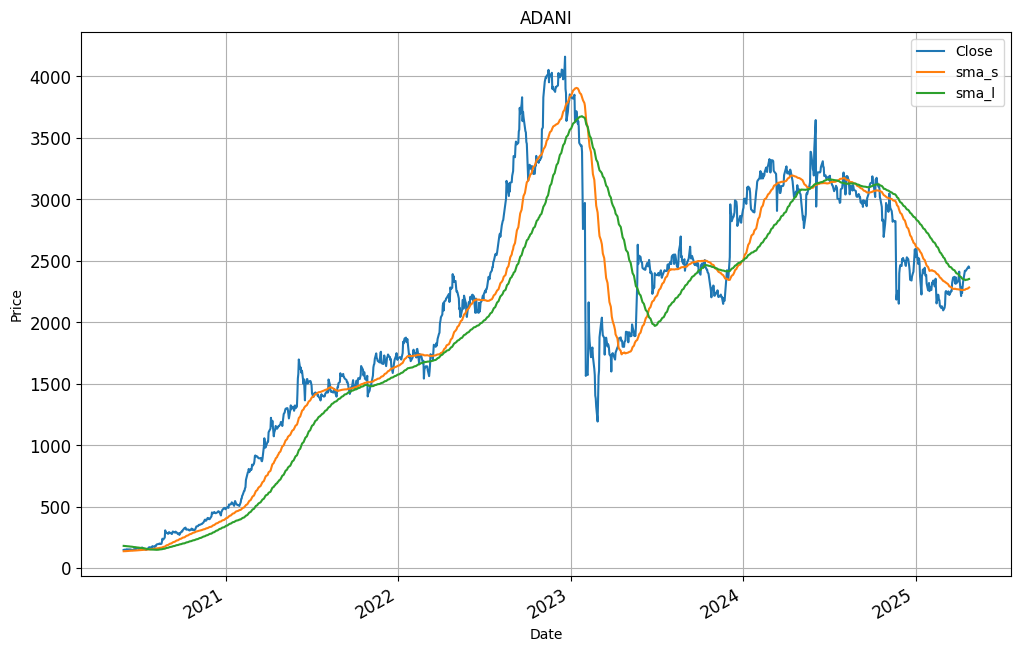

In [8]:
ad.plot(figsize=(12,8), title="ADANI", grid=True,fontsize=12,xlabel="Date",ylabel="Price")
plt.show()

In [9]:
import seaborn as sns
sns.set_style("darkgrid")


<Axes: title={'center': 'TATAMOTORS'}, xlabel='Date', ylabel='Price'>

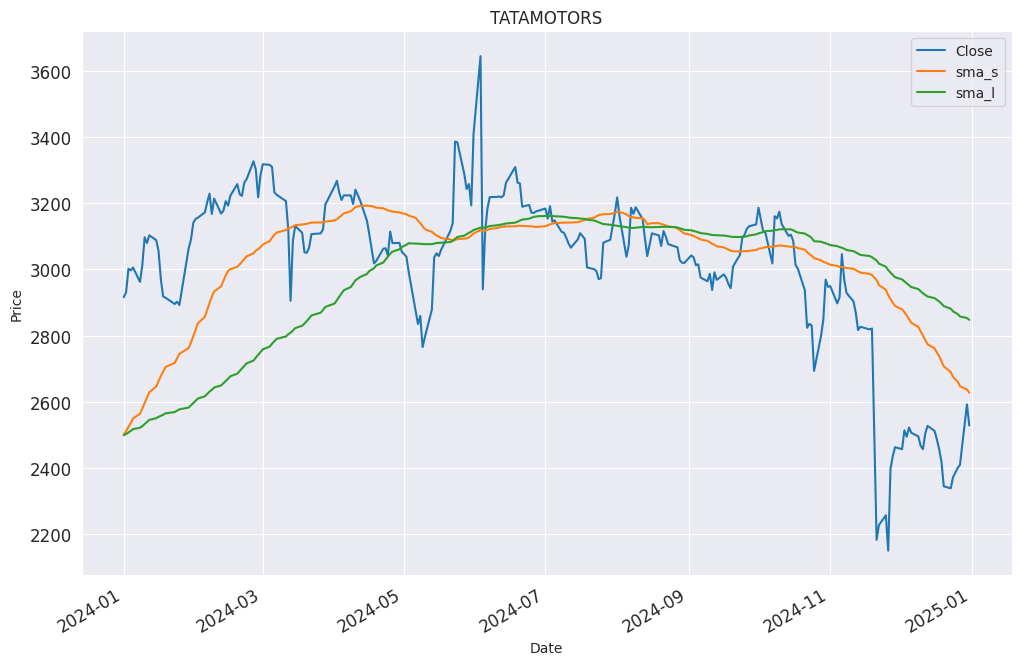

In [10]:
ad.loc["2024"].plot(figsize=(12,8), title="TATAMOTORS", grid=True,fontsize=12,xlabel="Date",ylabel="Price")

In [11]:
# now we are taking position whether to long or short
ad['position']= np.where(ad['sma_s']>ad['sma_l'],1,-1)
ad

,Close,sma_s,sma_l,position
Date,,,,
2020-05-29,147.980835,137.130722,180.479445,-1
2020-06-01,150.125488,137.187186,179.922429,-1
2020-06-02,149.576843,137.510943,179.326752,-1
2020-06-03,150.275101,137.874412,178.766776,-1
2020-06-04,147.631699,138.248389,178.267014,-1
...,...,...,...,...
2025-04-17,2418.100098,2269.539014,2344.319011,-1
2025-04-21,2442.699951,2272.993013,2346.466011,-1
2025-04-22,2445.500000,2276.666011,2348.346011,-1


<Axes: title={'center': 'TATAMOTORS'}, xlabel='Date'>

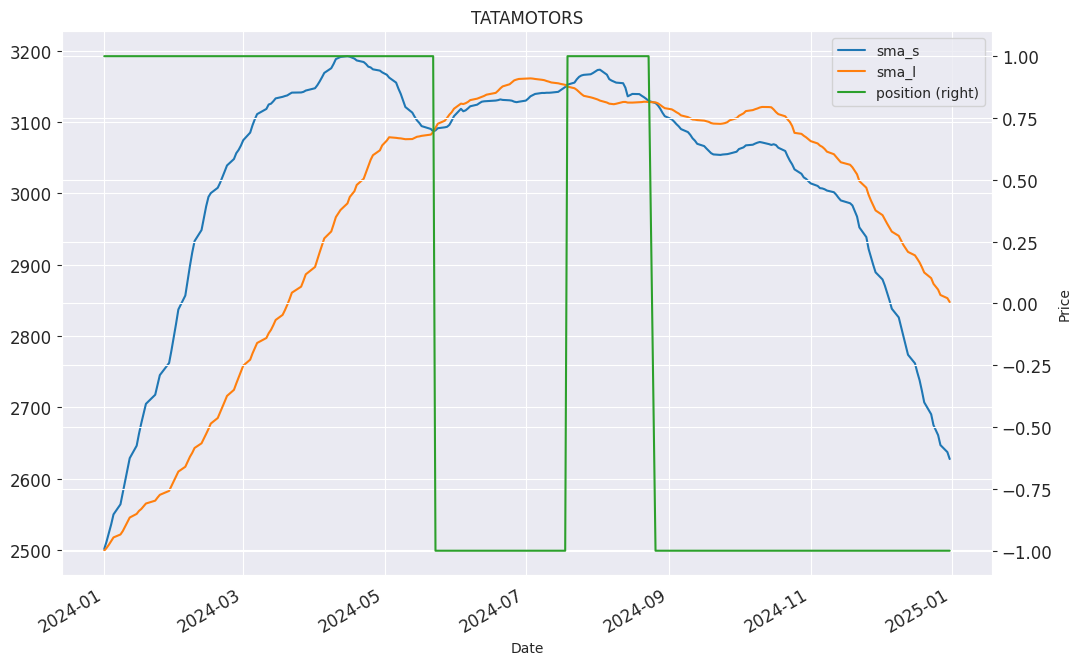

In [12]:
ad.loc["2024",["sma_s","sma_l","position"]].plot(figsize=(12,8), title="TATAMOTORS", grid=True,fontsize=12,xlabel="Date",ylabel="Price",secondary_y="position")

In [14]:
ad['returnsb&h'] = np.log(ad['Close'].div(ad["Close"].shift(1)))
ad

,Close,sma_s,sma_l,position,returnsb&h
Date,,,,,
2020-05-29,147.980835,137.130722,180.479445,-1,NaN
2020-06-01,150.125488,137.187186,179.922429,-1,0.014389
2020-06-02,149.576843,137.510943,179.326752,-1,-0.003661
2020-06-03,150.275101,137.874412,178.766776,-1,0.004657
2020-06-04,147.631699,138.248389,178.267014,-1,-0.017747
...,...,...,...,...,...
2025-04-17,2418.100098,2269.539014,2344.319011,-1,0.001034
2025-04-21,2442.699951,2272.993013,2346.466011,-1,0.010122
2025-04-22,2445.500000,2276.666011,2348.346011,-1,0.001146


In [17]:
ad["strategy"] = ad['position']*ad["returnsb&h"].shift(1)
ad.dropna(inplace=True)
ad

,Close,sma_s,sma_l,position,returnsb&h,strategy
Date,,,,,,
2020-06-02,149.576843,137.510943,179.326752,-1,-0.003661,-0.014389
2020-06-03,150.275101,137.874412,178.766776,-1,0.004657,0.003661
2020-06-04,147.631699,138.248389,178.267014,-1,-0.017747,-0.004657
2020-06-05,152.070618,138.736892,177.767080,-1,0.029624,0.017747
2020-06-08,152.270126,139.055098,177.294392,-1,0.001311,-0.029624
...,...,...,...,...,...,...
2025-04-17,2418.100098,2269.539014,2344.319011,-1,0.001034,0.001076
2025-04-21,2442.699951,2272.993013,2346.466011,-1,0.010122,-0.001034
2025-04-22,2445.500000,2276.666011,2348.346011,-1,0.001146,-0.010122


In [21]:
np.sum(ad["returnsb&h"])


np.float64(2.789305851024161)

In [20]:
np.sum(ad["strategy"])

np.float64(1.616381366130345)

In [22]:
# these are log returns now we have to calculate what 1 rupee would be according to both strategies if invested in start of data frame
ad[["returnsb&h","strategy"]].sum().apply(np.exp)

,0
returnsb&h,16.269722
strategy,5.034838


In [23]:
# now calculate the risk factor of both strategies(normal investment and sma strategy)
ad[["returnsb&h","strategy"]].std()*np.sqrt(252)

,0
returnsb&h,0.534116
strategy,0.534979


<Axes: xlabel='Date'>

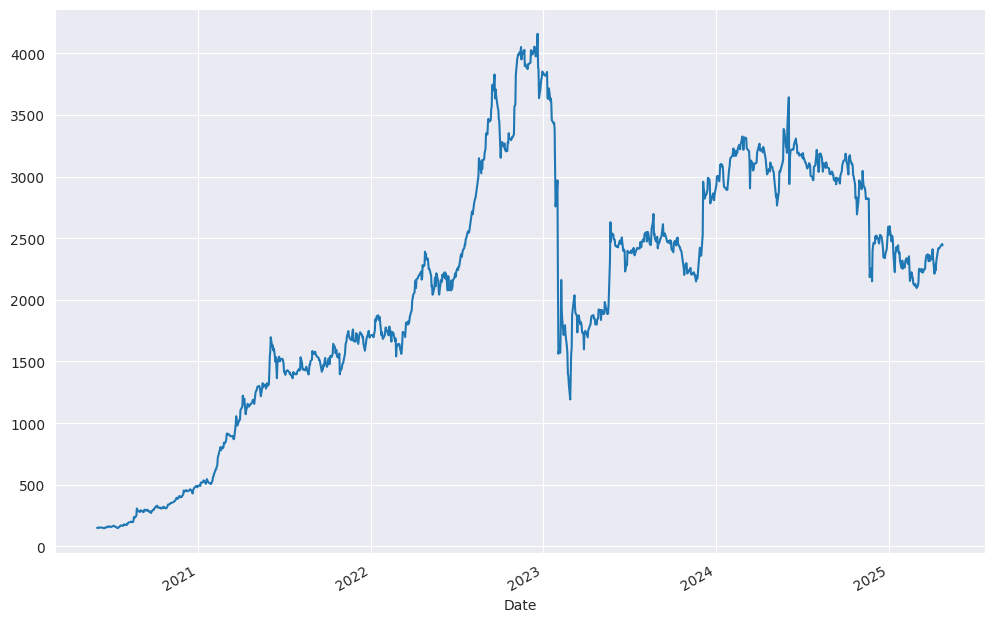

In [28]:
ad["Close"].plot(figsize=(12,8))

#Strategy adjusted with long bias

In [29]:
ad["position2"] = np.where(ad['sma_s']>ad['sma_l'],1,0)
ad

,Close,sma_s,sma_l,position,returnsb&h,strategy,position2
Date,,,,,,,
2020-06-02,149.576843,137.510943,179.326752,-1,-0.003661,-0.014389,0
2020-06-03,150.275101,137.874412,178.766776,-1,0.004657,0.003661,0
2020-06-04,147.631699,138.248389,178.267014,-1,-0.017747,-0.004657,0
2020-06-05,152.070618,138.736892,177.767080,-1,0.029624,0.017747,0
2020-06-08,152.270126,139.055098,177.294392,-1,0.001311,-0.029624,0
...,...,...,...,...,...,...,...
2025-04-17,2418.100098,2269.539014,2344.319011,-1,0.001034,0.001076,0
2025-04-21,2442.699951,2272.993013,2346.466011,-1,0.010122,-0.001034,0
2025-04-22,2445.500000,2276.666011,2348.346011,-1,0.001146,-0.010122,0


In [31]:
ad["strategy2"] = ad['position2']*ad["returnsb&h"].shift(1)
ad.dropna(inplace=True)
ad

,Close,sma_s,sma_l,position,returnsb&h,strategy,position2,strategy2
Date,,,,,,,,
2020-06-03,150.275101,137.874412,178.766776,-1,0.004657,0.003661,0,-0.0
2020-06-04,147.631699,138.248389,178.267014,-1,-0.017747,-0.004657,0,0.0
2020-06-05,152.070618,138.736892,177.767080,-1,0.029624,0.017747,0,-0.0
2020-06-08,152.270126,139.055098,177.294392,-1,0.001311,-0.029624,0,0.0
2020-06-09,151.522003,139.673555,176.749856,-1,-0.004925,-0.001311,0,0.0
...,...,...,...,...,...,...,...,...
2025-04-17,2418.100098,2269.539014,2344.319011,-1,0.001034,0.001076,0,-0.0
2025-04-21,2442.699951,2272.993013,2346.466011,-1,0.010122,-0.001034,0,0.0
2025-04-22,2445.500000,2276.666011,2348.346011,-1,0.001146,-0.010122,0,0.0


In [33]:
#log returns of strategy 2
ad[["returnsb&h","strategy2"]].sum()

,0
returnsb&h,2.792967
strategy2,2.212305


In [34]:
#what 1 rupee will be
ad[["returnsb&h","strategy2"]].sum().apply(np.exp)

,0
returnsb&h,16.329399
strategy2,9.136753


In [35]:
#risk factor
ad[["returnsb&h","strategy2"]].std()*np.sqrt(252)


,0
returnsb&h,0.534329
strategy2,0.416579


In [ ]:
#conclusion is that strategy 2 is better than strategy 1